In [1]:
%load_ext autoreload
%autoreload 2


import pickle
import os

import open3d as o3d
import numpy as np
from open3d.web_visualizer import draw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import mmdet3d

from mmdet3d.apis import inference_detector, init_model
# from sensus.utils.data_converter import pc2pc_object
from mmdet3d.utils import register_all_modules
from mmdet3d.structures.points import get_points_type
from mmdet3d.datasets.transforms.loading import LoadPointsFromFile

import sys
sys.path.append('../tools')
from visualizer import draw_lidar_labels, draw_lidar_results

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] Resetting default logger to print to terminal.


In [2]:
bin_path = '/home/javier/datasets/DAIR/single-infrastructure-side-mmdet/training/velodyne/002238.bin'
labels_path = '/home/javier/datasets/DAIR/single-infrastructure-side-mmdet/training/label_2/002238.txt'
img_path = '/home/javier/datasets/DAIR/single-infrastructure-side-mmdet/training/image_2/002238.png'
calib_path = '/home/javier/datasets/DAIR/single-infrastructure-side-mmdet/training/calib/002238.txt'

## Visualize Labels

[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: {"stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"}
FEngine (64 bits) created at 0x7f23d80079a0 (threading is enabled)
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.
EGL(1.5)
OpenGL(4.1)


WebVisualizer(window_uid='window_0')

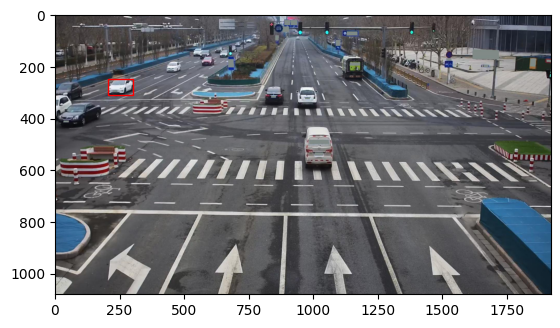

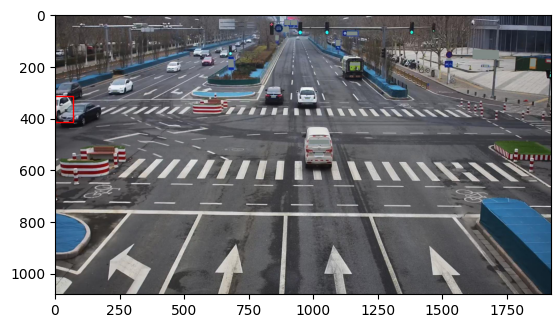

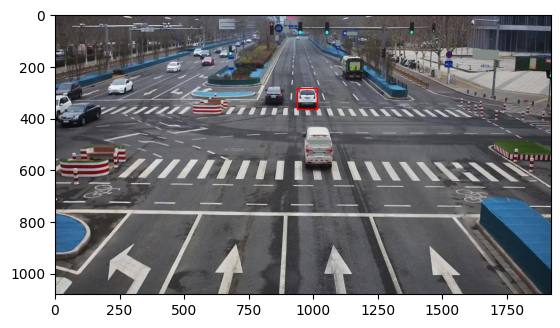

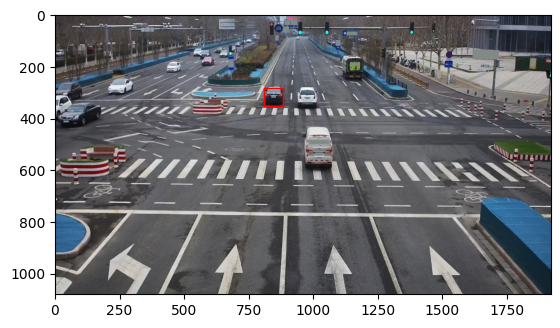

In [3]:
draw_lidar_labels(bin_path, calib_path, labels_path, img_path, num_cars = 4)

## Inference

In [4]:
register_all_modules()

## Build the model from a config file and a checkpoint file
config = '/home/javier/sensus-loci/sensus/configs/centerpoint/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_dair-3d.py'
checkpoint = '/home/javier/sensus-loci/work_dirs/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_dair-3d/epoch_40.pth'

/home/javier/sensus-loci/mmdetection3d/mmdet3d/evaluation/functional/kitti_utils/eval.py:10: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_thresholds(scores: np.ndarray, num_gt, num_sample_pts=41):


In [5]:
model = init_model(config, checkpoint, device='cuda:1')
result, data = inference_detector(model, bin_path)

Loads checkpoint by local backend from path: /home/javier/sensus-loci/work_dirs/centerpoint_voxel01_second_secfpn_8xb4-cyclic-20e_dair-3d/epoch_40.pth


## Sensus Viz

In [8]:
draw_lidar_results(bin_path, calib_path, result, num_cars=15)

[Open3D INFO] Window window_3 created.


WebVisualizer(window_uid='window_3')